In [8]:
import os

In [9]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [10]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [11]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [12]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
# https://www.tensorflow.org/install/source_windows

In [20]:
if os.name=='nt':
    !pip install wget
    import wget

In [21]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [22]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 fichier(s) d‚plac‚(s).
        1 fichier(s) copi‚(s).
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\proto

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
error: avro-python3 1.10.2 is installed but avro-python3!=1.9.2,<1.10.0,>=1.8.1 is required by {'apache-beam'}



copying build\lib\object_detection\export_tflite_ssd_graph_lib_tf1_test.py -> build\bdist.win-amd64\egg\object_detection
creating build\bdist.win-amd64\egg\object_detection\inference
copying build\lib\object_detection\inference\detection_inference.py -> build\bdist.win-amd64\egg\object_detection\inference
copying build\lib\object_detection\inference\detection_inference_tf1_test.py -> build\bdist.win-amd64\egg\object_detection\inference
copying build\lib\object_detection\inference\infer_detections.py -> build\bdist.win-amd64\egg\object_detection\inference
copying build\lib\object_detection\inference\__init__.py -> build\bdist.win-amd64\egg\object_detection\inference
copying build\lib\object_detection\inputs.py -> build\bdist.win-amd64\egg\object_detection
copying build\lib\object_detection\inputs_test.py -> build\bdist.win-amd64\egg\object_detection
creating build\bdist.win-amd64\egg\object_detection\legacy
copying build\lib\object_detection\legacy\eval.py -> build\bdist.win-amd64\egg\

Obtaining file:///C:/PFE/tensorflow%20object%20detection/TFODCourse/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [23]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-06-02 21:45:10.046369: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-02 21:45:10.046420: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.7.3: C:\PFE\tensorflow object detection\TFODCourse\tftf\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-02 21:45:14.318929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-06-02 21:45:14.318964: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-06-02 21:45:14.324710: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-ABG3P1C
2021-06-02 21:45:14.324825: I tensorflow/stream_exe

In [24]:
!pip install --upgrade tensorflow


I0602 21:45:33.264245 18100 efficientnet_model.py:147] round_filter input=192 output=272
I0602 21:45:33.264245 18100 efficientnet_model.py:147] round_filter input=320 output=448
I0602 21:45:33.642525 18100 efficientnet_model.py:147] round_filter input=1280 output=1792
I0602 21:45:33.686716 18100 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depth

In [25]:
!pip install tensorflow --upgrade

In [26]:

!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.1
Uninstalling protobuf-3.17.1:
  Successfully uninstalled protobuf-3.17.1


ERROR: Exception:
Traceback (most recent call last):
  File "c:\pfe\tensorflow object detection\tfodcourse\tftf\lib\site-packages\pip\_internal\cli\base_command.py", line 180, in _main
    status = self.run(options, args)
  File "c:\pfe\tensorflow object detection\tfodcourse\tftf\lib\site-packages\pip\_internal\commands\uninstall.py", line 89, in run
    uninstall_pathset.commit()
  File "c:\pfe\tensorflow object detection\tfodcourse\tftf\lib\site-packages\pip\_internal\req\req_uninstall.py", line 442, in commit
    self._moved_paths.commit()
  File "c:\pfe\tensorflow object detection\tfodcourse\tftf\lib\site-packages\pip\_internal\req\req_uninstall.py", line 282, in commit
    save_dir.cleanup()
  File "c:\pfe\tensorflow object detection\tfodcourse\tftf\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "c:\pfe\tensorflow object detection\tfodcourse\tftf\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 339, in wrapped_f
    

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.3.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.3.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.3.0 requires promise, which is not installed.
tensorflow-datasets 4.3.0 requires tensorflow-metadata, which is not installed.
tensorflow-datasets 4.3.0 requires tqdm, which is not installed.
google-cloud-bigquery 2.17.0 requires google-api-core[grpc]<2.0.0dev,>=1.23.0, which is not installed.
google-cloud-bigquery 2.17.0 requires google-cloud-core<2.0dev,>=1.4.1, which is not installed.
google-cloud-bigquery 2.17.0 requires google-resumable-media<2.0dev,>=0.6.0, which is not installed.
google-cloud-bigquery 2.17.0 requires packaging>=14.3, which is not installed.
google-cloud-bigquery 2.17.0 requires proto-plus>=1.10.0, which is not installe


  Using cached protobuf-3.17.1-cp37-cp37m-win_amd64.whl (908 kB)


In [27]:
import object_detection

In [28]:
!pip list

Package                       Version             Location
----------------------------- ------------------- -----------------------------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.29.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.9.3
cached-property               1.5.2
cachetools                    4.2.2
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
crcmod                        1.7
cycler                        0.10.0
cython                        3.0a7
decorator                     5.0.9
dill                          0.3.1.1
fastavro                      1.4.1
flatbuffers                   1.12
future                        0.18.2
gast                          0.4.0
gin-config                    0.4.0
google 


grpcio                        1.34.1
h5py                          3.1.0
hdfs                          2.6.0
httplib2                      0.17.4
idna                          2.10
importlib-metadata            4.2.0
ipykernel                     5.5.5
ipython                       7.23.1
ipython-genutils              0.2.0
jedi                          0.18.0
jupyter-client                6.1.12
jupyter-core                  4.7.1
kaggle                        1.5.12
Keras                         2.4.3
keras-nightly                 2.5.0.dev2021032900
Keras-Preprocessing           1.1.2
kiwisolver                    1.3.1
lvis                          0.5.3
lxml                          4.6.3
Markdown                      3.3.4
matplotlib                    3.2.0
matplotlib-inline             0.1.2
numpy                         1.19.5
oauth2client                  4.1.3
oauthlib                      3.1.0
object-detection              0.1
opencv-python                 4.5.2.52
opencv

In [29]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 fichier(s) d‚plac‚(s).


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [30]:
labels = [{'name':'Bonjour', 'id':1}, {'name':'Merci', 'id':2}, {'name':'Oui', 'id':3}, {'name':'Non', 'id':4}, {'name':'Cava', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [31]:
#crétion detfrecord
# Pour COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

x Tensorflow/workspace/images/train/
x Tensorflow/workspace/images/train/bonjour.476f3d38-a2b5-11eb-9220-005056c00008.jpg
x Tensorflow/workspace/images/train/bonjour.476f3d38-a2b5-11eb-9220-005056c00008.xml
x Tensorflow/workspace/images/train/bonjour.48ba82c0-a2b5-11eb-8d5d-005056c00008.jpg
x Tensorflow/workspace/images/train/bonjour.48ba82c0-a2b5-11eb-8d5d-005056c00008.xml
x Tensorflow/workspace/images/train/bonjour.49eec794-a2b5-11eb-a087-005056c00008.jpg
x Tensorflow/workspace/images/train/bonjour.49eec794-a2b5-11eb-a087-005056c00008.xml
x Tensorflow/workspace/images/train/bonjour.4ec31c68-a2b5-11eb-a4d7-005056c00008.jpg
x Tensorflow/workspace/images/train/bonjour.4ec31c68-a2b5-11eb-a4d7-005056c00008.xml
x Tensorflow/workspace/images/train/bonjour.4ff6c8e8-a2b5-11eb-899e-005056c00008.jpg
x Tensorflow/workspace/images/train/bonjour.4ff6c8e8-a2b5-11eb-899e-005056c00008.xml
x Tensorflow/workspace/images/train/bonjour.512b984a-a2b5-11eb-8950-005056c00008.jpg
x Tensorflow/workspace/image

In [32]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [33]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Traceback (most recent call last):
  File "Tensorflow\scripts\generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "C:\PFE\tensorflow object detection\TFODCourse\tftf\lib\site-packages\tensorflow-2.5.0-py3.7-win-amd64.egg\tensorflow\python\platform\app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "C:\PFE\tensorflow object detection\TFODCourse\tftf\lib\site-packages\absl_py-0.12.0-py3.7.egg\absl\app.py", line 303, in run
    _run_main(main, args)
  File "C:\PFE\tensorflow object detection\TFODCourse\tftf\lib\site-packages\absl_py-0.12.0-py3.7.egg\absl\app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "Tensorflow\scripts\generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "Tensorflow\scripts\generate_tfrecord.py", line 132, in create_tf_example
    classes.append(class_text_to_int(row['class']))
  File "Tensorflow\scripts\generate_tfrecord.py", line 101, in cl

In [34]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 fichier(s) copi‚(s).


In [13]:

#transfer learning
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [36]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [37]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [38]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [39]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [40]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [41]:
#train
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [42]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [43]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

In [20]:
#evaluation
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


In [14]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [15]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [16]:
#detectiona apartir d'une image
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:

category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [18]:


IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'oui.7a65841e-a2b5-11eb-8282-005056c00008.jpg')

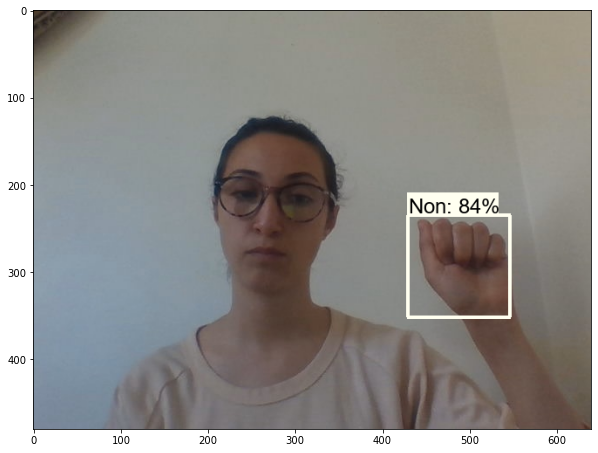

In [19]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
tf.config.run_functions_eagerly(True)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
!pip uninstall opencv-python-headless -y

In [20]:
#deetction enetemps réel
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

KeyboardInterrupt: 

In [ ]:
#Pour colab
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')